# Are stock returns normally distributed ?

The product of normally distributed variables ISN'T normally distributed ---> SIMPLE returns. 

The sum of normally distributed variables IS normally distributed ---> LOG returns.

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab 
import seaborn as sns
import scipy.stats as stats
import pandas_datareader as pdr
import plotly.offline as pyo

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

### Get stock market data

In [86]:
end = dt.datetime.now()
start = dt.datetime(2000, 1, 1)

df = pdr.get_data_yahoo('^GSPC', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


### Calculate Daily Simple Returns

In [87]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
                ...   
2022-07-21    0.009861
2022-07-22   -0.009332
2022-07-25    0.001315
2022-07-26   -0.011543
2022-07-27    0.010433
Name: Close, Length: 5677, dtype: float64

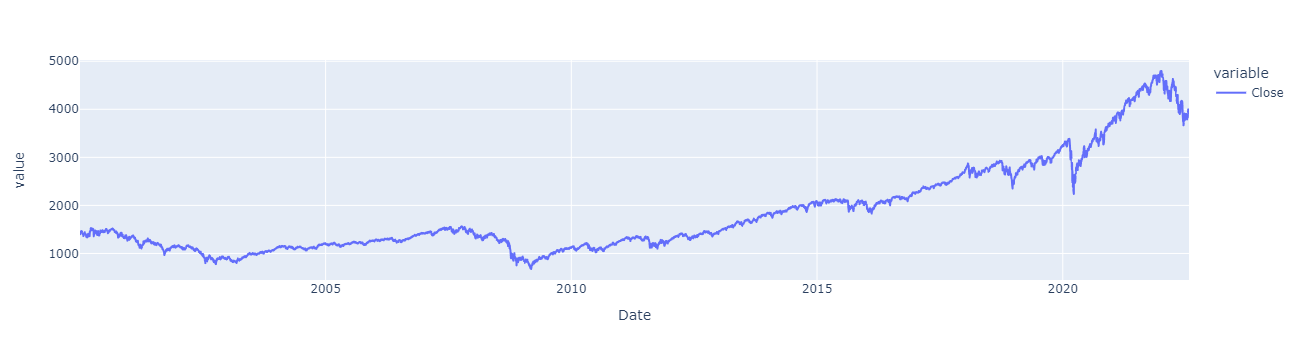

In [88]:
df.Close.plot()

In [89]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 1455.219970703125 Last 3961.9599609375


In [90]:
df.Close[0] * np.prod([(1 + Rt) for Rt in simple_returns])

3961.9599609374714

In [91]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2000-01-04   -0.039099
2000-01-05    0.001920
2000-01-06    0.000955
2000-01-07    0.026730
2000-01-10    0.011128
                ...   
2022-07-21    0.009813
2022-07-22   -0.009376
2022-07-25    0.001314
2022-07-26   -0.011610
2022-07-27    0.010379
Name: Close, Length: 5677, dtype: float64

In [92]:
log_returns.mean()

0.00017642800257961942

In [93]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

3961.959960937483

## Histogram of log returns

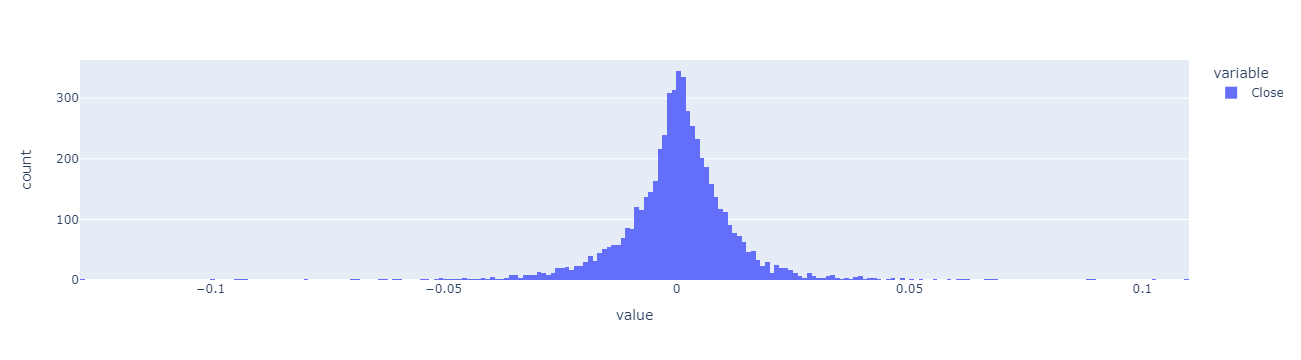

In [94]:
log_returns.plot(kind='hist')

### Is normality a good assumption for normal data ?

In [95]:
log_returns_sorted = log_returns.to_list()
log_returns_sorted.sort()

worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

standardized_worst = (worst - log_returns.mean()) / log_returns.std()
standardized_best = (best - log_returns.mean()) / log_returns.std()

In [96]:
print('Std deviation: worst =', round(standardized_worst, 2), ', best =', round(standardized_best, 2))
print('Probability: worst =', stats.norm(0, 1).pdf(standardized_worst), ', best =', stats.norm(0, 1).pdf(standardized_best))

Std deviation: worst = -10.25 , best = 8.77
Probability: worst = 6.2823451850613886e-24 , best = 7.949749490844605e-18


## Testing for Normality

### Quantile-Quantile Plots

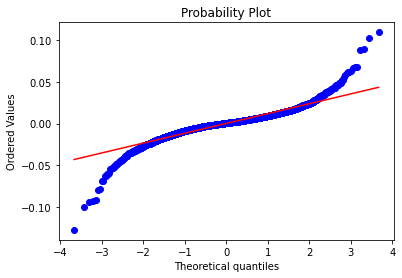

In [97]:
stats.probplot(log_returns, dist='norm', plot=pylab);

### Boxplots

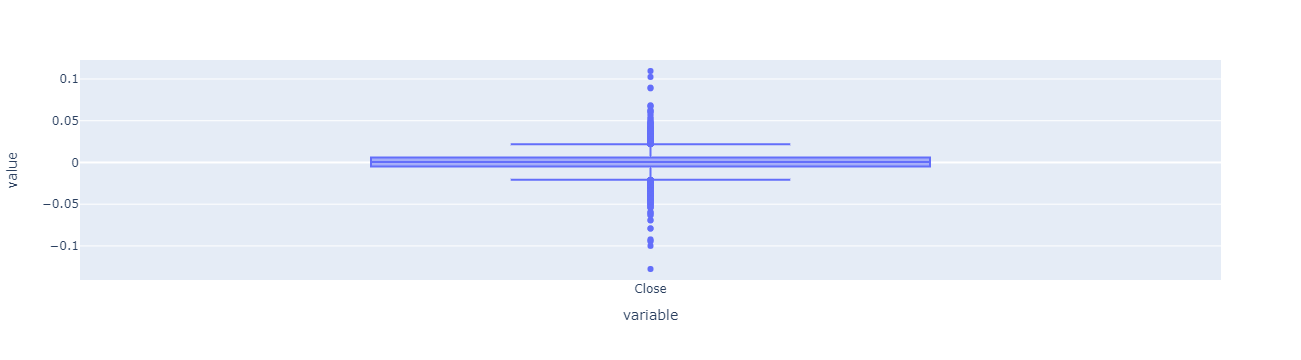

In [98]:
log_returns.plot(kind='box')

## Hypothesis Testing

### Kolmogorov Smirnov Test

In [99]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print('ks statistic:', ks_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

ks statistic: 0.47843320041384363 , p value: 0.0
Probably NOT Gaussian


### Shapiro Wilk Test

In [100]:
sw_stat, p_value = stats.shapiro(log_returns)
print('sw statistic:', sw_stat, ', p value:', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably NOT Gaussian')

sw statistic: 0.8960603475570679 , p value: 0.0
Probably NOT Gaussian


C:\Users\bergi\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.

